# Task6: Predicting Real Estate House Prices

## This task is provided to test your understanding of building a Linear Regression model for a provided dataset

### Dataset: Real_estate.csv

### Import the necessary libraries
#### Hint: Also import seaborn

In [1]:
import seaborn as sns
import pandas as pd

### Read the csv data into a pandas dataframe and display the first 5 samples

In [3]:
samples=pd.read_csv('/Users/nisargmodi/Desktop/ML_Assignments/Assignments/Real estate.csv')
samples

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


### Show more information about the dataset

In [4]:
samples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


### Find how many samples are there and how many columns are there in the dataset

In [5]:
samples.shape

(414, 8)

### What are the features available in the dataset?

In [6]:
features = samples.columns
print("What are the features available in the dataset:")
for feature in features:
    print(feature)

What are the features available in the dataset:
No
X1 transaction date
X2 house age
X3 distance to the nearest MRT station
X4 number of convenience stores
X5 latitude
X6 longitude
Y house price of unit area


### Check if any features have missing data

In [7]:
samples.isna().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

### Group all the features as dependent features in X

In [8]:
samples.iloc[:,:-1]

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067


### Group feature(s) as independent features in y

In [9]:
samples.iloc[:,-1:]

,Y house price of unit area
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1
...,...
409,15.4
410,50.0
411,40.6
412,52.5


### Split the dataset into train and test data

In [10]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
boston = load_boston()

X = boston.data
y = boston.target

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(354, 13)
(152, 13)
(354,)
(152,)


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

### Choose the model (Linear Regression)

In [11]:
from sklearn.linear_model import LinearRegression

### Create an Estimator object

In [12]:
estimator = LinearRegression()

### Train the model

In [13]:
estimator.fit(X, y)

LinearRegression()

### Apply the model

In [22]:
new_data=boston.data[:20]
predictions = estimator.predict(new_data)
predictions

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423,
       25.25628446, 23.00180827, 19.53598843, 11.52363685, 18.92026211,
       18.99949651, 21.58679568, 20.90652153, 19.55290281, 19.28348205,
       19.29748321, 20.52750979, 16.91140135, 16.17801106, 18.40613603])

### Display the coefficients

In [23]:
estimator.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

### Find how well the trained model did with testing data

In [16]:
from sklearn.metrics import  r2_score

y_pred = estimator.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f"r2 Score: {r2:}")

r2 Score: 0.8146361027201625


### Plot House Age Vs Price
#### Hint: Use regplot in sns

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


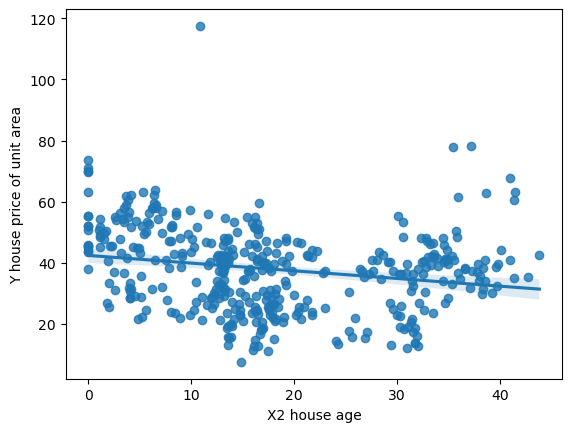

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot("X2 house age", "Y house price of unit area", data=samples, fit_reg=True)
plt.xlabel("X2 house age")
plt.ylabel("Y house price of unit area")
plt.show()

### Plot Distance to MRT station Vs Price

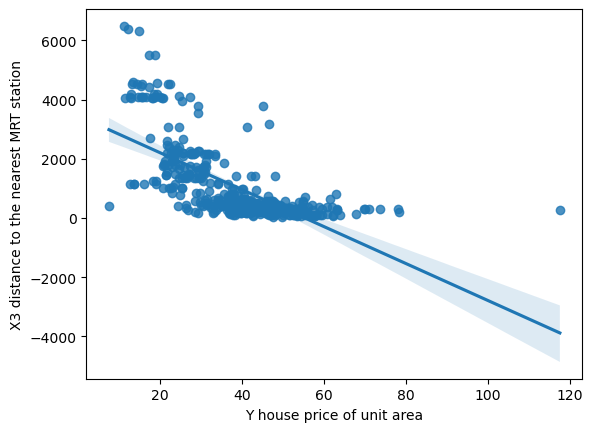

In [18]:
sns.regplot("Y house price of unit area", "X3 distance to the nearest MRT station", data=samples, fit_reg=True)
plt.xlabel("Y house price of unit area")
plt.ylabel("X3 distance to the nearest MRT station")
plt.show()

### Plot Number of Convienience Stores Vs Price

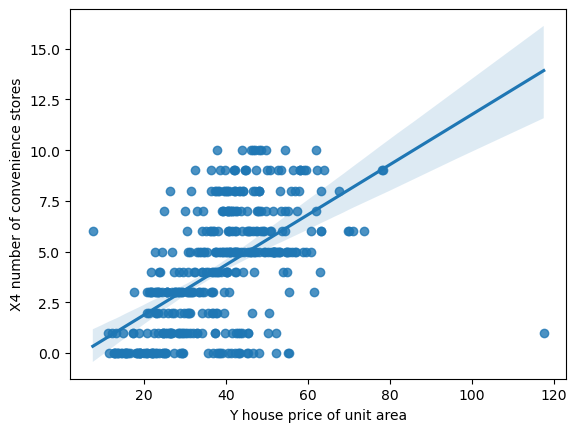

In [19]:
sns.regplot("Y house price of unit area", "X4 number of convenience stores", data=samples, fit_reg=True)
plt.xlabel("Y house price of unit area")
plt.ylabel("X4 number of convenience stores")
plt.show()